## **Funções**
As imagens coloridas são representadas pelas cores RGB (Red, Green, Blue). Cada pixel de uma imagem contem 3 dimensões de cores. Uma matriz RGB 2x2 seria representada da seguinte forma:


```
[
  [ [25, 186, 210], [8, 14, 92] ]
  [ [2, 75, 91], [110, 210, 125] ]
]
```

Quando convertemos uma matriz RGB para tons de cinza (valores entre 0 e 255), reduzimos cada pixel de três dimensões para uma única dimensão, usando a fórmula que pondera as intensidades de R, G e B.

**Cinza = 0.2989 * R + 0.5870 * G + 0.1140 * B**

```
[
  # Os valores foram convertidos para inteiros.
  [141, 21],
  [55, 170]
]
```

**Binarização**

O Processo de binarização reduz ainda mais os valores dos pixels em tons de cinza para apenas dois valores possíveis (0 ou 255). A conversão para 0 e 255 usa um limiar, que serve como referencia para decidir se um pixel será preto (0) ou branco (255). O limiar nesse caso é definido pela metade do último tom de cor (255), e arredondado para um número inteiro.

**Limiar = 255 / 2 = 128**

Os pixels maiores ou igual a 128 são definidos como branco (255) e os menores como preto (0).

```
[ 1, 0 ]
[ 0, 1 ]
```




In [1]:
def rgb_para_cinza(imagem_array):

  """
  A função converte cada pixel da imagem para tons de cinza usando a fórmula:
  Cinza = 0.2989 * r + 0.5870 * g + 0.1140 * b
  """

  # Altura e largura da imagem
  altura = len(imagem_array)
  largura = len(imagem_array[0])

  # Cria uma nova matriz para armazenar a imagem em tons de cinza
  imagem_cinza = [[0] * largura for _ in range(altura)]

  # Percorre cada pixel da imagem
  for i in range(altura):
    for j in range(largura):
      # Armazena os valores RGB do pixel
      r, g, b = imagem_array[i][j]
      # Converte para tons de cinza
      cinza = 0.2989 * r + 0.5870 * g + 0.1140 * b
      # Armazena o tom de cinza na matriz
      imagem_cinza[i][j] = cinza

  return imagem_cinza

In [2]:
def binarizar_imagem(imagem_array, limiar=128):

  """
  A função transforma os valores dos pixels em preto ou branco, usando limiar=128
  """

  # Altura e Largura da imagem
  altura = len(imagem_array)
  largura = len(imagem_array[0])

  # Cria uma nova matriz para armazenar a imagem binaria
  imagem_binarizada = [[0] * largura for _ in range(altura)]

  for i in range(altura):
    for j in range(largura):
      # Caso o valor do pixel seja >= 128 converte para 255, caso contrário para 0.
      imagem_binarizada[i][j] = 255 if imagem_array[i][j] >= limiar else 0

  return imagem_binarizada


## **Carregamento e transformação da imagem**

A imagem é carregada usando a função ```Image.open(path)``` e transformada em um array usando o numpy. O array guarda as dimensões de cada pixel da imagem para serem convertidos posteriormente usando a função ```rgb_para_cinza```.

Por último, transformamos a imagem convertida para cinza em uma imagem binária de preto e branco usando a função ```binarizar_imagem```, e salvamos a imagem.

In [9]:
import numpy as np
from PIL import Image

# Caminho do arquivo
path = '/content/city_image.jpg'
imagem_original = np.array(Image.open(path))

# Convertendo a imagem para tons de cinza
cinza = rgb_para_cinza(imagem_original)

# Convertendo a imagem para preto e branco
binarizacao = binarizar_imagem(cinza)

# Salvando a Imagem em Tons de Cinza
imagem_cinza = Image.fromarray(np.array(cinza, dtype=np.uint8))
imagem_cinza.save('imagem_cinza.jpg')

# Salvando a Imagem Binária
imagem_binaria = Image.fromarray(np.array(binarizacao,  dtype=np.uint8))
imagem_binaria.save('imagem_binaria.jpg')

## **Imagens**

Plotando a imagem original, imagem em tons de cinza e imagem binária.

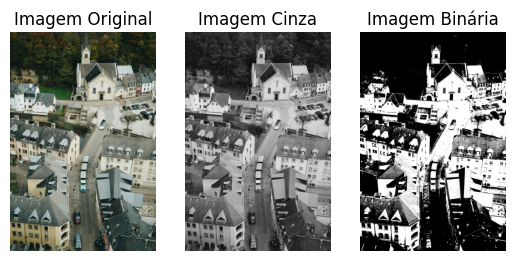

In [10]:
import matplotlib.pyplot as plt

# Imagem Original
plt.subplot(1, 3, 1)
plt.imshow(imagem_original)
plt.title("Imagem Original")
plt.axis('off')

# Imagem Cinza
plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem Cinza")
plt.axis('off')

# Imagem Binária
plt.subplot(1, 3, 3)
plt.imshow(imagem_binaria, cmap='gray')
plt.title("Imagem Binária")
plt.axis('off')


plt.show()